## Analyze A/B Test Results



## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [2]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score,recall_score,accuracy_score
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [3]:
df=pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


c. The number of unique users in the dataset.

In [5]:
df.user_id.nunique()

290584

d. The proportion of users converted.

In [6]:
df.query('converted==1').user_id.nunique()/df.user_id.nunique()

0.12104245244060237

e. The number of times the `new_page` and `treatment` don't line up.

In [7]:
df.query('landing_page=="new_page"').query('group!="treatment"').count()

user_id         1928
timestamp       1928
group           1928
landing_page    1928
converted       1928
dtype: int64

In [8]:
df.query('landing_page=="old_page"').query('group!="control"').count()


user_id         1965
timestamp       1965
group           1965
landing_page    1965
converted       1965
dtype: int64

In [9]:
print(1928+1965)

3893


f. Do any of the rows have missing values?

In [10]:
df.isnull().any()

user_id         False
timestamp       False
group           False
landing_page    False
converted       False
dtype: bool

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [4]:
df2=df.query('landing_page=="new_page"').query('group=="treatment"').append(df.query('landing_page=="old_page"').query('group=="control"'))

In [12]:
df2.tail()

,user_id,timestamp,group,landing_page,converted
294471,718310,2017-01-21 22:44:20.378320,control,old_page,0
294473,751197,2017-01-03 22:28:38.630509,control,old_page,0
294474,945152,2017-01-12 00:51:57.078372,control,old_page,0
294475,734608,2017-01-22 11:45:03.439544,control,old_page,0
294476,697314,2017-01-15 01:20:28.957438,control,old_page,0


In [13]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [14]:
df2.user_id.nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [15]:
df2.user_id.value_counts()

773192    2
630732    1
811737    1
797392    1
795345    1
801490    1
799443    1
787157    1
793302    1
817882    1
842446    1
815835    1
805596    1
803549    1
809694    1
807647    1
895712    1
840399    1
836301    1
899810    1
834242    1
936604    1
934557    1
940702    1
938655    1
830144    1
828097    1
832195    1
838348    1
821956    1
         ..
734668    1
736717    1
730574    1
775632    1
771538    1
642451    1
773587    1
783828    1
785877    1
779734    1
781783    1
759256    1
726472    1
748999    1
746950    1
753093    1
751044    1
740803    1
738754    1
744897    1
742848    1
634271    1
632222    1
636316    1
630169    1
650647    1
648598    1
654741    1
652692    1
630836    1
Name: user_id, Length: 290584, dtype: int64

c. What is the row information for the repeat **user_id**? 

In [16]:
df2.query('user_id=="773192"').head()

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [17]:
df2.drop(index=2893,axis=1,inplace=True)

In [18]:
df2.count()

user_id         290584
timestamp       290584
group           290584
landing_page    290584
converted       290584
dtype: int64

`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [19]:
df2.converted.mean()

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [20]:
df2.query('group=="control"').converted.mean()

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [21]:
df2.query('group=="treatment"').converted.mean()

0.11880806551510564

d. What is the probability that an individual received the new page?

In [22]:
df2.query('landing_page=="new_page"').count()

user_id         145310
timestamp       145310
group           145310
landing_page    145310
converted       145310
dtype: int64

In [23]:
df2.query('landing_page=="old_page"').count()

user_id         145274
timestamp       145274
group           145274
landing_page    145274
converted       145274
dtype: int64

In [24]:
print(145310/290584)

0.5000619442226688


e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

尽管看到新页面的测试组人数，和看旧页面的控制组人数接近，且新页面用户的转化率(11.88%)低于旧页面用户转化率(12%),但这仅仅是1次抽样，存在随机性。且这里还存在其他影响因素，如看新页面的是否都是新用户（因为老用户短期内可能抗拒改变），且还要考虑时间(天/周/季度)引起的变化，因此仅仅凭以上两组数据转化率的简单比较，还不足以证明新页面转化是否要好于旧页面。

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

Null Hypothese:**$p_{old}$**-**$p_{new}$** >= 0         
Alternative Hypothese:**$p_{old}$**-**$p_{new}$** < 0

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [25]:
df2.converted.mean()

0.11959708724499628

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [26]:
df2.converted.mean()

0.11959708724499628

c. What is $n_{new}$?

In [27]:
df2.query('landing_page=="new_page"').count()

user_id         145310
timestamp       145310
group           145310
landing_page    145310
converted       145310
dtype: int64

d. What is $n_{old}$?

In [28]:
df2.query('landing_page=="old_page"').count()

user_id         145274
timestamp       145274
group           145274
landing_page    145274
converted       145274
dtype: int64

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [5]:
new_page_converted=np.random.choice(df2.converted,145310,replace=True).mean()

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [6]:
old_page_converted=np.random.choice(df2.converted,145274,replace=True).mean()

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [7]:
new_page_converted-old_page_converted

-0.0006284480209849258

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [8]:
p_diffs=[]
for _ in range(10000):
    new_page_converted=np.random.choice(df2.converted,145310,replace=True).mean()
    old_page_converted=np.random.choice(df2.converted,145274,replace=True).mean()
    p_diffs.append(new_page_converted-old_page_converted)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

(array([  18.,  169.,  616., 1720., 2781., 2622., 1502.,  469.,   92.,
          11.]),
 array([-4.39318051e-03, -3.49776546e-03, -2.60235040e-03, -1.70693534e-03,
        -8.11520282e-04,  8.38947760e-05,  9.79309834e-04,  1.87472489e-03,
         2.77013995e-03,  3.66555501e-03,  4.56097007e-03]),
 <a list of 10 Patch objects>)

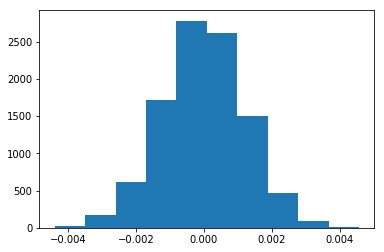

In [9]:
plt.hist(p_diffs)

In [10]:
np.std(p_diffs)

0.001211683237145278

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [39]:
df2.query('group=="treatment"').converted.mean()-df2.query('group=="control"').converted.mean()

-0.0015782389853555567

In [44]:
p_diffs=np.array(p_diffs)

In [45]:
(p_diffs>-0.0015782389853555567).mean()

0.497

In [11]:
null_vals=np.random.normal(0,np.std(p_diffs),10000)

In [12]:
(null_vals>-0.0015782389853555567).mean()

0.902

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

The p-value is the probability of observing the statistic (or more extremes supporting the alternative hypothesis) if the null hypothesis is true. The alternative hypothesis here is: P(new)-P(old)>0, so it is necessary to observe the shaded area to the right of the statistic and calculate p as the proportion of simulated samples greater than the sample mean. If the p-value is large, it means that the null hypothesis cannot be discarded, but the current p-value is 0.9, which means that the null hypothesis that the old page is better than the new page cannot be discarded.

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [53]:
import statsmodels.api as sm

convert_old =df2.query('group=="control"').converted.sum()
convert_new =df2.query('group=="treatment"').converted.sum()
n_old =df2.query('group=="control"').shape[0]
n_new =df2.query('group=="treatment"').shape[0] 


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [54]:
z_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new],alternative='smaller')
z_score, p_value 

(1.3109241984234394, 0.9050583127590245)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

In [61]:
from scipy.stats import norm
norm.ppf(1-0.05)

1.6448536269514722

By adjusting the proportions_ztest function to one-tail, the p-value of the alternative hypothesis is 0.9050, which is close to the p-value (0.9113) calculated after simulating the normal distribution. Therefore, the null hypothesis that the old page is better than the new page cannot be discarded. By calculating the one-tail critical value, we get 1.64, and the z-score is 1.31<1.64, indicating that the statistical significance is not strong.

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

逻辑回归

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [66]:
df2['intercept']=1
df2[['ab_page','old_page']]=pd.get_dummies(df2['landing_page'])
df2.drop('old_page',axis=1)

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1,1,1
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1,1,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1,1,1
10,929503,2017-01-18 05:37:11.527370,treatment,new_page,0,1,1
11,834487,2017-01-21 22:37:47.774891,treatment,new_page,0,1,1
12,803683,2017-01-09 06:05:16.222706,treatment,new_page,0,1,1
13,944475,2017-01-22 01:31:09.573836,treatment,new_page,0,1,1
14,718956,2017-01-22 11:45:11.327945,treatment,new_page,0,1,1


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [67]:
logit_mod=sm.Logit(df2['converted'],df2[['intercept','ab_page']])
results=logit_mod.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [68]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Mon, 13 Aug 2018   Pseudo R-squ.:               8.077e-06
Time:                        10:18:42   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

ab_page的p值为0.19,而PartII 中的p值为0.90。产生这2者差异的原因为：PartII用的是单尾检验， pold - pnew < 0，而逻辑回归模型中的假设“具体的斜率系数β 是否为零”,即H_0:β_i=0,H_1:β_i≠0,是双尾检验。p值的差异主要是对立假设的方向性，即partII中的单尾检验和回归模型中的双尾检验 差异造成的。

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

针对个人用户的转化，还有其他影响因素需要考虑，如该用户是否为旧用户在浏览新页面(可能因短期无法适应新页面造成转化率较低)，以及样本在时间分布上是否一致(如周末用户时间更充裕转化率可能高于工作日)，以及用户自身其他属性（如年龄性别、教育水平、收入、地域等）差异，也会影响其对新旧页面的接受度及转化率。但完成特定类型的特征工程时，如用对数或者指数，这可能会使回归系数无法解释。

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [69]:
countries_df = pd.read_csv('./countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page,old_page
user_id,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,1
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,1
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0


In [76]:
### Create the necessary dummy variables
df_new[['CA','UK','US']]=pd.get_dummies(df_new['country'])
logit_modc=sm.Logit(df_new['converted'],df_new[['intercept','CA','UK','ab_page']])
results_c=logit_modc.fit()
results_c.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Mon, 13 Aug 2018   Pseudo R-squ.:               2.323e-05
Time:                        10:34:41   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9893      0.009   -223.763      0.000      -2.007      -1.972
CA            -0.0408      0.027     -1.516      0.130      -0.093       0.012
UK             0.0099      0.013      0.743      0.457      -0.016       0.036
ab_page       -0.0149      0.011     -1.307      0.191      -0.037       0.007
==============================================================================
"""

In [77]:
X=df_new[['intercept','CA','UK','ab_page']]
y=df_new['converted']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
log_mod_c=LogisticRegression()
log_mod_c.fit(X_train,y_train)
y_preds=log_mod_c.predict(X_test)
print(precision_score(y_test,y_preds))
print(recall_score(y_test,y_preds))
print(accuracy_score(y_test,y_preds))

0.0
0.0
0.8797597948965019


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Since the correlation coefficients of Canada and the United Kingdom are very close to 0.96 and 0.99 after exponentiation, users from different countries have little impact on the conversion rate.

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [74]:
### Fit Your Linear Model And Obtain the Results
df_new['page_CA'] = df_new['ab_page'] * df_new['CA']
df_new['page_UK'] = df_new['ab_page'] * df_new['UK']
logit_modcp=sm.Logit(df_new['converted'],df_new[['intercept','page_CA','page_UK','CA','UK','ab_page']])
results_cp=logit_modcp.fit()
results_cp.summary()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290578
Method:                           MLE   Df Model:                            5
Date:                Mon, 13 Aug 2018   Pseudo R-squ.:               3.482e-05
Time:                        10:28:59   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1920
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9865      0.010   -206.344      0.000      -2.005      -1.968
page_CA       -0.0469      0.054     -0.872      0.383      -0.152       0.059
page_UK        0.0314      0.027      1.181      0.238      -0.021       0.084
CA            -0.0175      0.038     -0.465      0.642      -0.091       0.056
UK            -0.0057      0.019     -0.306      0.760      -0.043       0.031
ab_page       -0.0206      0.014     -1.505      0.132      -0.047       0.006
==============================================================================
"""

In [75]:
X=df_new[['intercept','page_CA','page_UK','CA','UK','ab_page']]
y=df_new['converted']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
log_mod_cp=LogisticRegression()
log_mod_cp.fit(X_train,y_train)
y_preds=log_mod_cp.predict(X_test)
print(precision_score(y_test,y_preds))
print(recall_score(y_test,y_preds))
print(accuracy_score(y_test,y_preds))

0.0
0.0
0.8797597948965019


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


<a id='conclusions'></a>
## Conclusions
Judging from the fitting results, the correlation coefficients of different variables are very close after exponentiation. The only difference is in UK, where the correlation coefficient is 0.99 after exponentiation, and page_UK is 1.03 after exponentiation, which are higher than other variables. This shows that letting British users see the new page will have a slightly stronger impact on convert.
Judging from the p-value, the p-value of each variable is greater than the usual alpha level of 0.05, which means that the impact of each variable on converted is not statistically significant.













